<a href="https://colab.research.google.com/github/adewoleopeyemi/NrMetricsProject/blob/master/NRMetricsExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install git+https://github.com/umang-singhal/pydom.git
!pip install image-quality
!unzip "/content/drive/My Drive/NightTimeImages.zip"
!unzip "/content/drive/My Drive/NoisyImages.zip"

  Cloning https://github.com/umang-singhal/pydom.git to /tmp/pip-req-build-zyltpz9j
  Running command git clone -q https://github.com/umang-singhal/pydom.git /tmp/pip-req-build-zyltpz9j
  Created wheel for pydom: filename=pydom-0.1-cp36-none-any.whl size=17989 sha256=393cc23ef2d02451a7b7225c4d0a72981dcf48c44ebfa6dba65d6e9645136dba
  Stored in directory: /tmp/pip-ephem-wheel-cache-kwv3igj_/wheels/4b/df/5b/1f7acae7f96c0b8fce3f2e4640100f7a297eab816f17bdb358
Successfully built pydom
     |████████████████████████████████| 153kB 5.1MB/s 
     |████████████████████████████████| 174kB 13.9MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233338 sha256=7a89a6556776ec09e1aec8599b1a4d4b0f442355679935baaa6e51300bb0462b
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm
Archive:  /content/drive/My Drive/NightTimeImages.zip
  inflating: testcam1.jpg            
  inflating: te

In [ ]:
from dom import DOM

In [ ]:
from PIL import Image
img = Image.open("/content/drive/My Drive/blurry.jpg")

In [ ]:
img

In [ ]:
iqa = DOM()

# using image path
score = iqa.get_sharpness("/content/drive/My Drive/noisy.jpg")
print("Sharpness:", score)

In [ ]:
import numpy as np
img = np.array(img)

In [ ]:
i = iqa.smoothenImage(img)

In [ ]:
import numpy as np
from skimage import io, img_as_float
import imquality.brisque as brisque

#img = img_as_float(io.imread('noisy_images/BSE.jpg', as_gray=True))

#Now let us check BRISQUE scores for a bunch of blurred images.
 
img0 = img_as_float(io.imread('/content/drive/My Drive/noisy.jpg'))

score0 = brisque.score(img0)

print("BRISQUE Score for 0 blur = ", score0)

BRISQUE Score for 0 blur =  30.531268479340127


In [47]:
from PIL import Image
img = Image.open("noise6.jpg")

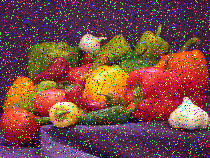

In [48]:
img

In [49]:
from skimage.restoration import estimate_sigma

def estimate_noise(image_path):
    img = cv2.imread(image_path)
    return estimate_sigma(img, multichannel=True, average_sigmas=True)

noise = estimate_noise("/content/noise6.jpg")

In [51]:
#high number means low noise
print(noise)

36.969278165596215


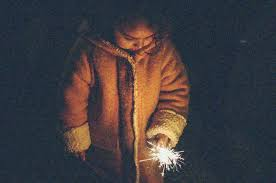

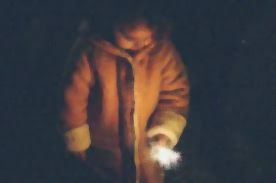

In [58]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/noise8.jpg")
kernel= np.ones((2, 2), np.float32)/5
filter = cv2.filter2D(img, -1, kernel)
medianblur = cv2.medianBlur(img, 5)
bliateral_filter = cv2.bilateralFilter(img, 9, 75, 75)
cv2_imshow(img)
#cv2_imshow(filter)
#Gblurimg = cv2.GaussianBlur(img, (3, 3), 0)
cv2_imshow(medianblur)
#cv2_imshow(Gblurimg)
#cv2_imshow(bliateral_filter)

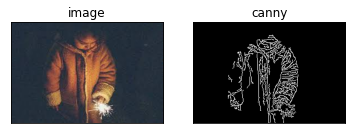

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgx = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(imgx, 100, 200)

titles = ['image', 'canny']
images = [imgx, canny]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

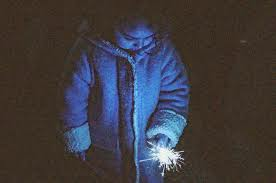

In [60]:
cv2_imshow(imgx)

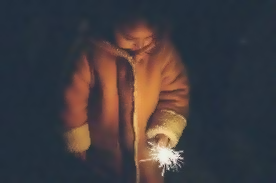

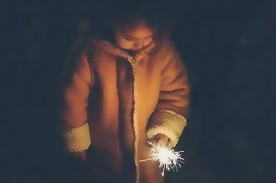

In [63]:
output1 = cv2.inpaint(bliateral_filter, canny, 3, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(bliateral_filter, canny, 3, cv2.INPAINT_NS)

    
    


cv2_imshow(output1)
cv2_imshow(bliateral_filter)


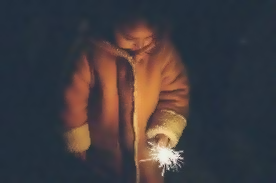

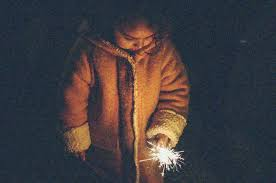

In [64]:
cv2_imshow(output1)
cv2_imshow(img)


In [ ]:
img = cv2.imread("/content/drive/My Drive/blurry.jpg")

In [ ]:
plt.imshow(img)

In [ ]:
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
import cv2

img = cv2.imread("/content/drive/My Drive/mblurry.jpg")

img = color.rgb2gray(img)

psf = np.ones((2, 2)) / 4

# Add Noise to Image
img_noisy = img.copy()
img_noisy += (np.random.poisson(lam=9, size=img.shape) - 10) / 255.
 
# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(img, psf, iterations=2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
  a.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original Data')

ax[1].imshow(img_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=img_noisy.min(), vmax=img_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

In [ ]:
score0 = brisque.score(img)
print(score0)

In [ ]:
score1 = brisque.score(Gblurimg)
print(score1)

In [ ]:
score2 = brisque.score(bliateral_filter)
print(score2)

In [ ]:
score2 = brisque.score(output1)
print(score2)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img0)